In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import LeavePOut

In [70]:
df_jinhyeok = pd.read_csv("./data/진혁_데이터프레임.csv")
df_jinhyeok.rename(columns={"Unnamed: 0":"행정구역","Unnamed: 1":"계절","Unnamed: 2":"연도"},inplace=True)

month_spring = ["_3","_4","_5"]
month_summer = ["_5","_6","_7","_8"]
month_fall = ["_8","_9","_10","_11"]
month_winter = ["_8","_9","_10","_11","_12","_1","_2"]

season = ["spring", "summer", "fall", "winter"]

for i in range(len(season)) : 
    globals()["df_"+season[i]] = df_jinhyeok[df_jinhyeok["계절"]==season[i]]  # 계절별로 데이터 프레임 형성
    globals()["df_"+season[i]] = globals()["df_"+season[i]].groupby(["행정구역","계절","연도"]).mean()   # 행정구역, 계절, 연도를 인덱스로 groupby

In [ ]:
# df=df[df['행정구역']=='강원도']
# df=pd.pivot_table(df, index=["일시", '행정구역'],aggfunc="mean")
# df=df.query('일시.str.contains("03|04|05")', engine='python')
# df=df.query('일시.str.contains("2000")', engine='python')

In [71]:
spr = "|".join(w for w in month_spring)

In [4]:
# df_spring.columns[df_spring.columns.str.contains(spr+"|면적|생산")]

In [72]:
for i in range(len(season)) : 
    globals()["month_str_"+season[i]] = "|".join(w for w in globals()["month_"+season[i]])  # 각 계절별 월을 | 으로 join
    
    # 각 계절이 속하는 월과 면적, 생산이 속하는 컬럼명을 리스트로 저장
    globals()["col_of_"+season[i]] = globals()["df_"+season[i]].columns[globals()["df_"+season[i]].columns.str.contains(globals()["month_str_"+season[i]]+"|면적|생산")]

In [146]:
print(month_spring)
print(col_of_spring)

['_3', '_4', '_5']
Index(['평균기온(°C)_3월', '최고기온(°C)_3월', '최저기온(°C)_3월', '월합강수량(00~24h만)(mm)_3월',
       '합계 일사량(MJ/m2)_3월', '평균기온(°C)_4월', '최고기온(°C)_4월', '최저기온(°C)_4월',
       '월합강수량(00~24h만)(mm)_4월', '합계 일사량(MJ/m2)_4월', '평균기온(°C)_5월',
       '최고기온(°C)_5월', '최저기온(°C)_5월', '월합강수량(00~24h만)(mm)_5월',
       '합계 일사량(MJ/m2)_5월', '면적 (ha)', '생산량 (톤)'],
      dtype='object')


In [73]:
# 데이터프레임을 계절별로 분리
df_spring = df_spring[col_of_spring]
df_summer = df_summer[col_of_summer]
df_fall = df_fall[col_of_fall]
df_winter = df_winter[col_of_winter]

In [74]:
df_winter.dropna(how="any",inplace=True)
# df_winter

In [75]:
city = ["서울특별시", "부산광역시", "대구광역시", "인천광역시", "광주광역시", "대전광역시", "울산광역시", "세종특별자치시", "경기도", "강원도", "충청북도", "충청남도", "전라북도", "전라남도", "경상북도", "경상남도", "제주도"]
city = sorted(city)
# city

In [76]:
median_city = []
for City in city : 
    m = df_fall.loc[(City),"면적 (ha)"].mean()    # 행정구역별로 면적의 평균값을 저장
    median_city.append(m)
# median_city

In [77]:
# 면적도 0이고 생산량도 0인 행에, 행정구역별 평균값 채우기
for i in range(len(df_spring)) : 
    if (df_spring.iloc[i,-2]==0) and (df_spring.iloc[i,-1]==0) : 
        a = df_spring.iloc[i].to_frame().columns
        b = a[0][0]
        c = city.index(b)
        m = median_city[c]
        df_spring.loc[a,"면적 (ha)"] = m

# df_spring[df_spring["면적 (ha)"] == 0]


In [78]:
for i in range(len(df_summer)) : 
    if (df_summer.iloc[i,-2]==0) and (df_summer.iloc[i,-1]==0) : 
        a = df_summer.iloc[i].to_frame().columns
        b = a[0][0]
        c = city.index(b)
        m = median_city[c]
        df_summer.loc[a,"면적 (ha)"] = m

for i in range(len(df_fall)) : 
    if (df_fall.iloc[i,-2]==0) and (df_fall.iloc[i,-1]==0) : 
        a = df_fall.iloc[i].to_frame().columns
        b = a[0][0]
        c = city.index(b)
        m = median_city[c]
        df_fall.loc[a,"면적 (ha)"] = m


In [84]:
for i in range(len(df_winter)) : 
    if (df_winter.iloc[i,-2]==0) and (df_winter.iloc[i,-1]==0) : 
        a = df_winter.iloc[i].to_frame().columns
        b = a[0][0]
        c = city.index(b)
        m = median_city[c]
        df_winter.loc[a,"면적 (ha)"] = m


평균기온(°C)_1월  최고기온(°C)_1월  최저기온(°C)_1월  \
행정구역 계절     연도                                            
강원도  winter 2014         5.85        17.75        -1.45   
            2015        -1.00        11.50       -15.30   
            2016        -2.80         9.90       -14.40   
            2017        -6.10         7.30       -23.50   
            2018        -5.15         8.70       -22.50   
...                       ...          ...          ...   
충청북도 winter 2017         1.70        16.15       -13.90   
            2018        -0.40        14.30       -18.60   
            2019         6.85        17.85        -3.25   
            2020        -1.90        13.90       -20.80   
            2021        -3.10        13.30       -19.60   

                  월합강수량(00~24h만)(mm)_1월  합계 일사량(MJ/m2)_1월  평균기온(°C)_2월  \
행정구역 계절     연도                                                           
강원도  winter 2014                  80.80           109.025         4.25   
            2015                  42.10           174.910        -2.20   
            2016                  38.70           233.465        -2.20   
            2017                  37.20           257.045        -2.20   
            2018                  42.55           264.890        -1.45   
...                                 ...               ...          ...   
충청북도 winter 2017                  33.30           275.670         5.20   
            2018                  36.00           274.140         3.70   
            2019                  82.85           218.455         9.20   
            2020                  26.95           255.445         2.90   
            2021                  18.20           285.645         1.80   

                  최고기온(°C)_2월  최저기온(°C)_2월  월합강수량(00~24h만)(mm)_2월  \
행정구역 계절     연도                                                      
강원도  winter 2014        12.90         -2.3                  12.00   
            2015         8.40        -12.8                   2.90   
            2016         8.40        -14.2                   3.70   
            2017        13.50        -17.3                  53.00   
            2018        12.00        -17.1                  47.85   
...                       ...          ...                    ...   
충청북도 winter 2017        21.65         -5.4                  33.40   
            2018        21.90         -7.6                  33.00   
            2019        22.95         -2.3                  52.00   
            2020        19.35        -10.2                  15.30   
            2021        22.10        -11.9                  12.30   

                  합계 일사량(MJ/m2)_2월  ...  최저기온(°C)_11월  월합강수량(00~24h만)(mm)_11월  \
행정구역 계절     연도                      ...                                         
강원도  winter 2014           315.045  ...          2.35                  102.95   
            2015           335.030  ...         -6.00                   32.00   
            2016           352.855  ...         -7.60                   37.30   
            2017           295.820  ...         -7.40                   15.50   
            2018           304.950  ...         -7.70                   10.60   
...                            ...  ...           ...                     ...   
충청북도 winter 2017           325.740  ...         -1.45                   51.95   
            2018           337.560  ...         -2.80                   86.40   
            2019           309.905  ...          6.60                   59.40   
            2020           343.280  ...         -3.75                   89.50   
            2021           359.560  ...         -5.20                   44.90   

                  합계 일사량(MJ/m2)_11월  평균기온(°C)_12월  최고기온(°C)_12월  최저기온(°C)_12월  \
행정구역 계절     연도                                                                  
강원도  winter 2014            283.795          8.05         18.30          0.05   
            2015            258.560          0.60         15.40        -11.10   
           

In [86]:
df_spring.fillna(0,inplace=True)
df_summer.fillna(0,inplace=True)
df_fall.fillna(0,inplace=True)

print(df_spring.info())


<class 'pandas.core.frame.DataFrame'>
MultiIndex: 374 entries, ('강원도', 'spring', 2000) to ('충청북도', 'spring', 2021)
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   평균기온(°C)_3월            374 non-null    float64
 1   최고기온(°C)_3월            374 non-null    float64
 2   최저기온(°C)_3월            374 non-null    float64
 3   월합강수량(00~24h만)(mm)_3월  374 non-null    float64
 4   합계 일사량(MJ/m2)_3월       374 non-null    float64
 5   평균기온(°C)_4월            374 non-null    float64
 6   최고기온(°C)_4월            374 non-null    float64
 7   최저기온(°C)_4월            374 non-null    float64
 8   월합강수량(00~24h만)(mm)_4월  374 non-null    float64
 9   합계 일사량(MJ/m2)_4월       374 non-null    float64
 10  평균기온(°C)_5월            374 non-null    float64
 11  최고기온(°C)_5월            374 non-null    float64
 12  최저기온(°C)_5월            374 non-null    float64
 13  월합강수량(00~24h만)(mm)_5월  374 non-null    float64
 14  합계 일사량(MJ/m2)_5

In [151]:
df_spring[:30]

평균기온(°C)_3월  최고기온(°C)_3월  최저기온(°C)_3월  \
행정구역 계절     연도                                            
강원도  spring 2000         4.40        19.30        -8.60   
            2001         5.25        19.75        -8.60   
            2002         7.30        19.70        -7.30   
            2003         6.60        21.30        -6.00   
            2004         6.90        20.30        -4.90   
            2005         7.90        19.40        -3.70   
            2006         6.10        20.20        -6.80   
            2007         9.10        18.30        -2.50   
            2008         6.30        18.90        -4.80   
            2009         4.90        20.70        -8.90   
            2010         8.70        19.90        -2.90   
            2011         5.10        17.60        -5.10   
            2012         6.45        18.75        -3.85   
            2013         5.20        20.30        -8.65   
            2014         9.00        19.40        -0.90   
            2015         4.40        19.10        -9.70   
            2016         4.90        20.70        -8.90   
            2017         3.30        21.60        -8.50   
            2018         4.05        22.00        -7.50   
            2019         7.10        22.20        -6.00   
            2020         5.40        23.00        -7.00   
            2021         6.30        23.50        -5.50   
경기도  spring 2000         9.10        24.60        -3.20   
            2001         5.90        23.70        -5.50   
            2002         9.60        22.70        -3.30   
            2003         5.00        21.00        -6.10   
            2004         4.30        22.80        -7.70   
            2005         8.50        23.60        -3.20   
            2006         3.20        18.10        -6.40   
            2007         6.10        21.70        -3.40   

                  월합강수량(00~24h만)(mm)_3월  합계 일사량(MJ/m2)_3월  평균기온(°C)_4월  \
행정구역 계절     연도                                                           
강원도  spring 2000                  14.10           448.650        10.40   
            2001                   2.55           455.280        10.85   
            2002                  33.10           519.210        12.70   
            2003                  28.50           523.000        11.90   
            2004                  19.90           481.750        12.60   
            2005                  27.40           518.290        13.00   
            2006                  17.80           504.500        11.90   
            2007                  48.10           495.900        13.20   
            2008                   3.10           389.500        11.90   
            2009                  15.50           486.280        10.80   
            2010                  58.50           519.210        13.60   
            2011                   2.80           471.030        10.60   
            2012                  29.00           486.315        11.50   
            2013                  28.55           458.470        10.85   
            2014                  77.45           477.255        12.80   
            2015                   7.10           481.820         9.90   
            2016                  15.50           486.280        10.80   
            2017                  20.60           445.030        12.00   
            2018                  10.20           484.580        12.15   
            2019                   9.30           500.880        13.20   
            2020                   8.90           424.480        12.70   
            2021                  26.90           493.070        13.40   
경기도  spring 2000                   5.60           481.380        15.80   
            2001                  16.00           483.960        13.70   
            2002                   6.10           439.570        15.00   
            2003                  18.10           396.530        13.60   
            2004                  11.30           472.005

In [152]:
# len(df_spring.values.T[0])

In [153]:
# corr[16]

<AxesSubplot:>

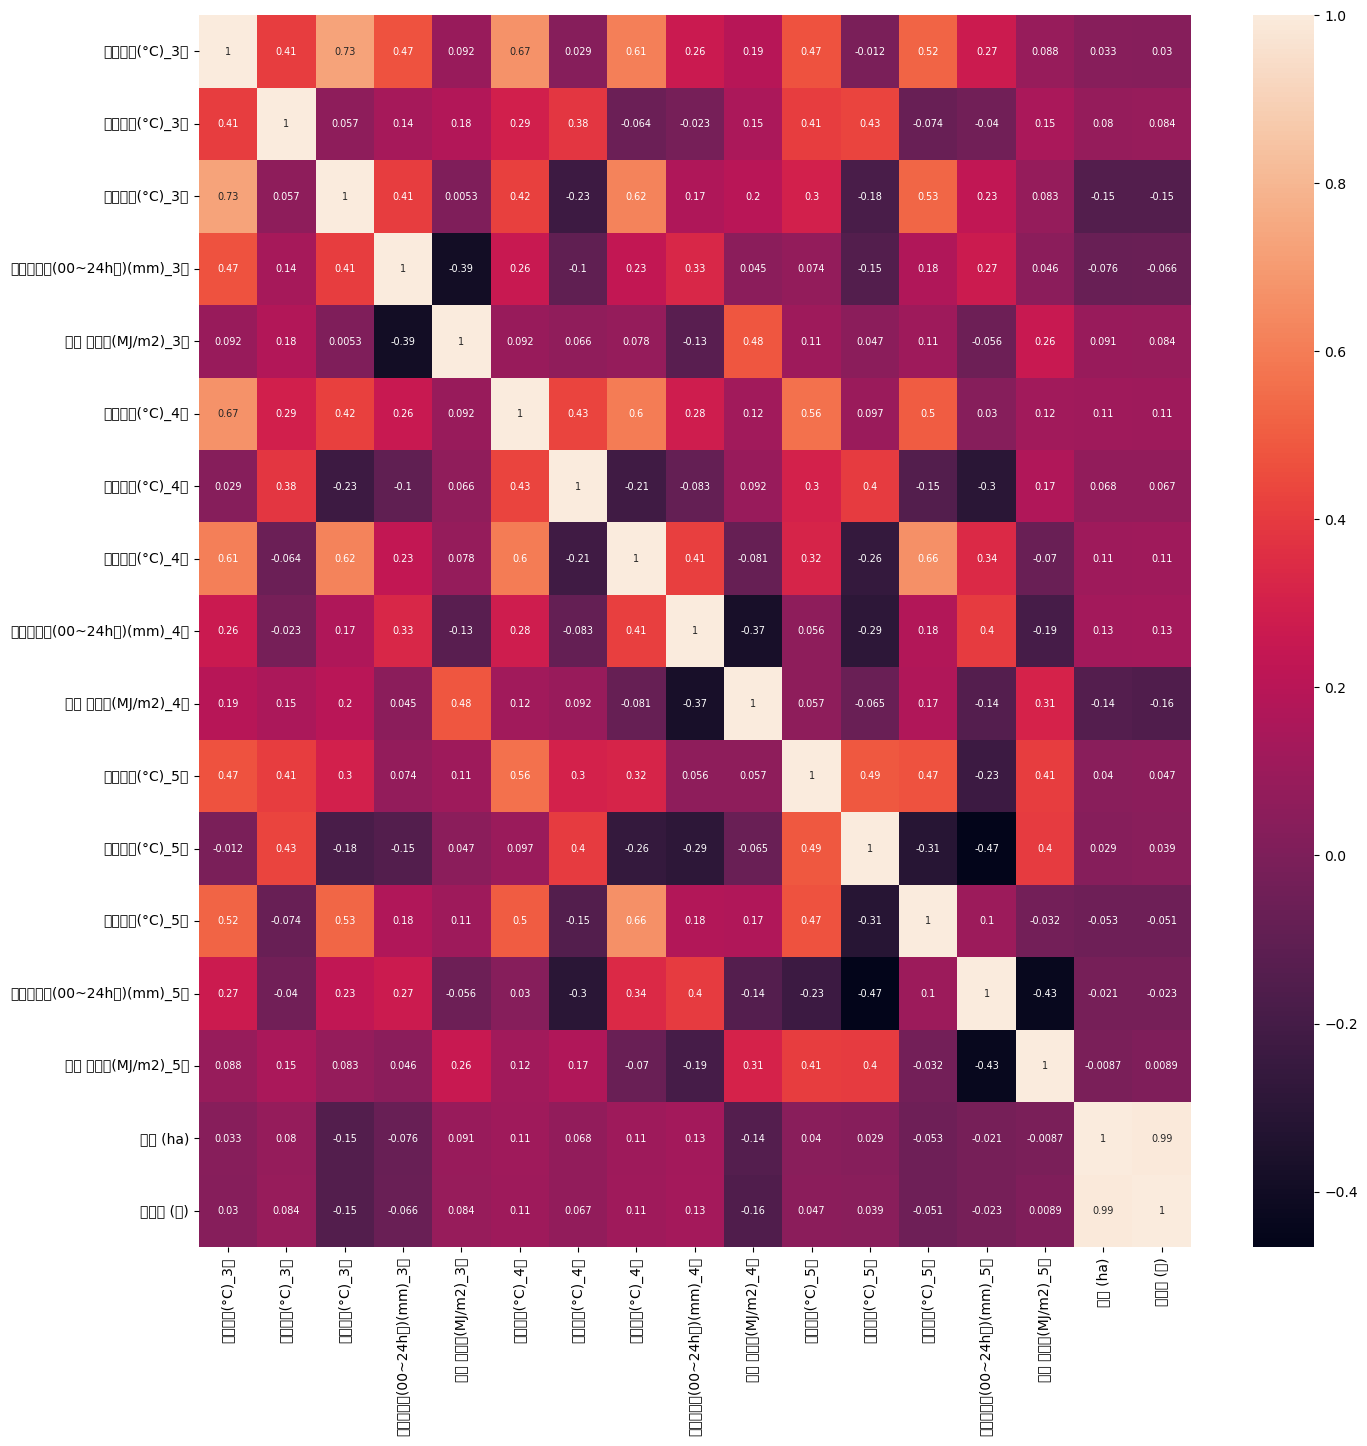

In [87]:
corr = np.corrcoef(df_spring.values.T)
fig = plt.figure(figsize=(16,16))
sns.heatmap(corr, cbar=True, annot=True, square=False, xticklabels=df_spring.columns, yticklabels=df_spring.columns, annot_kws={"size":7})

Lasso 모델을 이용한 생산량 예측

In [ ]:
# # 데이터셋을 정규화
# std_X = StandardScaler()
# std_y = StandardScaler()
# std.fit(df_spring)
# df_spring_std = std.transform(df_spring)

In [88]:
feature_spring = df_spring.iloc[:,:-1]
target_spring = df_spring.iloc[:,-1]
# feature_spring.info()
# target_spring.info()

In [89]:
# 데이터셋을 정규화
std_X = StandardScaler()
std_y = StandardScaler()
std_X.fit(feature_spring)
std_y.fit(target_spring.values.reshape(-1,1))

feature_spring = std_X.transform(feature_spring)
target_spring = std_y.transform(target_spring.values.reshape(-1,1))

In [90]:
# 학습셋과 테스트셋을 분리
X_train, X_test, y_train, y_test = train_test_split(feature_spring, target_spring, test_size=0.2, random_state=19)

In [91]:
lasso = Lasso(alpha=0.1, max_iter=500)
lasso.fit(X_train, y_train)
y_pred = lasso.predict(X_test)
print("rmse :", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 score :", r2_score(y_test, y_pred))


rmse : 0.20796831123690565
R2 score : 0.9591991811614794


In [92]:
# lasso.coef_

array([-0.        ,  0.        , -0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        , -0.        ,
        0.        ,  0.        , -0.        , -0.        ,  0.        ,
        0.89376059])

In [ ]:
# KFold를 이용한 교차 검증도 고려해 보고 싶음

In [ ]:
std_y.inverse_transform(y_pred.reshape(-1,1))

In [93]:
feature_summer = df_summer.iloc[:,:-1]
target_summer = df_summer.iloc[:,-1]

std_X_summer = StandardScaler()
std_y_summer = StandardScaler()
std_X_summer.fit(feature_summer)
std_y_summer.fit(target_summer.values.reshape(-1,1))

feature_summer = std_X_summer.transform(feature_summer)
target_summer = std_y_summer.transform(target_summer.values.reshape(-1,1))

X_train, X_test, y_train, y_test = train_test_split(feature_summer, target_summer, test_size=0.2, random_state=19)

lasso_summer = Lasso(alpha=0.1, max_iter=500)
lasso_summer.fit(X_train, y_train)
y_pred = lasso_summer.predict(X_test)
print("rmse :", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 score :", r2_score(y_test, y_pred))

rmse : 0.7295583227163088
R2 score : 0.6692218183026877


In [94]:
lasso_summer.coef_

array([-0.        ,  0.        , -0.        , -0.        , -0.        ,
       -0.        ,  0.        , -0.        ,  0.        , -0.04561232,
        0.        ,  0.        ,  0.        ,  0.        , -0.        ,
       -0.        , -0.        , -0.        ,  0.        , -0.        ,
        0.63488403])

In [ ]:
plt.plot(range(len(y_test)),std_y_summer.inverse_transform(y_test))
plt.plot(range(len(y_pred)),std_y_summer.inverse_transform(y_pred.reshape(-1,1)))


In [95]:
feature_fall = df_fall.iloc[:,:-1]
target_fall = df_fall.iloc[:,-1]

std_X_fall = StandardScaler()
std_y_fall = StandardScaler()
std_X_fall.fit(feature_fall)
std_y_fall.fit(target_fall.values.reshape(-1,1))

feature_fall = std_X_fall.transform(feature_fall)
target_fall = std_y_fall.transform(target_fall.values.reshape(-1,1))

X_train, X_test, y_train, y_test = train_test_split(feature_fall, target_fall, test_size=0.2, random_state=19)

lasso_fall = Lasso(alpha=0.1, max_iter=500)
lasso_fall.fit(X_train, y_train)
y_pred = lasso_fall.predict(X_test)
print("rmse :", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 score :", r2_score(y_test, y_pred))

rmse : 0.24469526172012993
R2 score : 0.9472950621648976


In [96]:
feature_winter = df_winter.iloc[:,:-1]
target_winter = df_winter.iloc[:,-1]

std_X_winter = StandardScaler()
std_y_winter = StandardScaler()
std_X_winter.fit(feature_winter)
std_y_winter.fit(target_winter.values.reshape(-1,1))

feature_winter = std_X_winter.transform(feature_winter)
target_winter = std_y_winter.transform(target_winter.values.reshape(-1,1))

X_train, X_test, y_train, y_test = train_test_split(feature_winter, target_winter, test_size=0.2, random_state=19)

lasso_winter = Lasso(alpha=0.1, max_iter=500)
lasso_winter.fit(X_train, y_train)
y_pred = lasso_winter.predict(X_test)
print("rmse :", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 score :", r2_score(y_test, y_pred))

rmse : 0.33939438954623447
R2 score : -20.641896217142232


In [162]:
X_train, X_test, y_train, y_test = train_test_split(feature_spring, target_spring, test_size=0.2, random_state=19)

rf_spring = RandomForestRegressor(n_estimators=50, max_depth=3, random_state=19)
rf_spring.fit(X_train, y_train)
y_pred = rf_spring.predict(X_test)
print("rmse :", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 score :", r2_score(y_test, y_pred))

rmse : 0.15234357368175308
R2 score : 0.9781061152918745


In [163]:
X_train, X_test, y_train, y_test = train_test_split(feature_summer, target_summer, test_size=0.2, random_state=19)

rf_summer = RandomForestRegressor(n_estimators=50, max_depth=3, random_state=19)
rf_summer.fit(X_train, y_train)
y_pred = rf_summer.predict(X_test)
print("rmse :", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 score :", r2_score(y_test, y_pred))

rmse : 0.2704887195432559
R2 score : 0.9545310276106976


In [ ]:
df_summer.iloc[:22]